# MNIST Data Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# MNIST Data Set from openml

In [3]:
mnist = fetch_openml(('mnist_784'), version = 1)

# Features and values

In [4]:
x = mnist.data
y = mnist.target.astype(int) #Converts label to integer format

# Preprocess the data

In [5]:
x = x/255.0 # Normalise the pixelto[0,1]

# Split the data into Train and Test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model of by the given values

In [7]:
log_reg_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
log_reg_model.fit(x_train, y_train) 

c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

# Prediction

In [9]:
y_pred = log_reg_model.predict(x_test)

# Evaluation of the Model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [11]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9205

Confusion Matrix:
 [[1298    1    7    0    3   11   11    4    6    2]
 [   0 1548    6   10    3   12    0    4   15    2]
 [   5   19 1233   21   16   10   20   17   29   10]
 [   6    9   29 1284    1   38    7   18   23   18]
 [   6    3    5    5 1201    5   10    8    7   45]
 [   4   11    7   44   12 1119   23    4   35   14]
 [   5    5   19    1   14   17 1331    1    3    0]
 [   6    4   26    3   10    6    0 1415    1   32]
 [  10   27   13   44    6   41    9    9 1180   18]
 [   7   11    5   13   37    7    0   46   16 1278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94     

# Visualize the Model Predictions

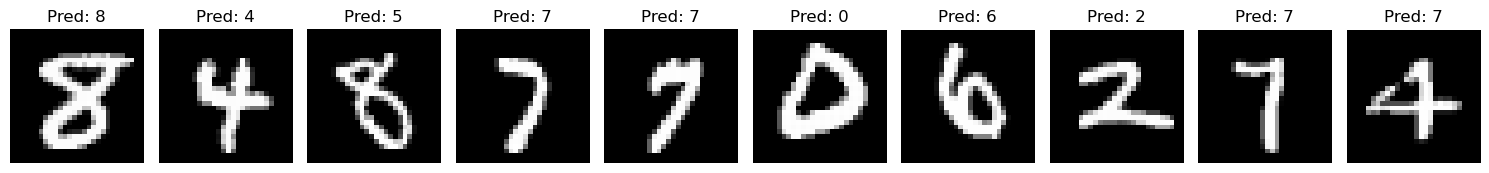

In [13]:
# Visualize a few test images with their predicted labels
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(x_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()